In [1]:
from Kmeans import Kmeans, BiKmeans

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
## convert text file into matrix
def file2matrix(filename , header = True, delimeter="\t", index_y = None):
    """
    Takes a .txt file and returns a list of column names,a matrix of features and
    a vectore of y in case of having a target variable.
    """    
    fr = open(filename)
    colName = []
    if header == True:
        colName = list(fr.readline().strip().split(delimeter))
    numberOfLines = len(fr.readlines())
    fr = open(filename)
    numberOfX = len(fr.readline().split(delimeter)) 
    if index_y is not None:
        numberOfX = len(fr.readline().split(delimeter))-1                   
    returnMatX = np.zeros((numberOfLines,numberOfX))
    classLabelVector = []
    fr = open(filename)
    firstRow = 0
    if header == True:
        firstRow = 1
    index = 0
    for line in fr.readlines()[firstRow:]:
        line = line.strip()                            
        listFromLine = line.split(delimeter)
        if index_y is not None:
            classLabelVector.append(float(listFromLine[index_y]))
            listFromLine.pop(index_y)
        fltListFromLine = list(map(lambda x: float(x) if x!="" else np.nan, listFromLine))                                 
        returnMatX[index,:] = fltListFromLine        
        index += 1
    return colName, returnMatX, classLabelVector

In [4]:
filename = 'testSet.txt'
colName, returnMatX, target = file2matrix(filename , header = False, delimeter="\t")
X = returnMatX

In [5]:
model = Kmeans(k=4, n_init=3, method = "euclidean", maxIter = 300, normalize = False)
model.fit(X)
model.labels_
centroids = model.centroids_
labels = model.labels_  

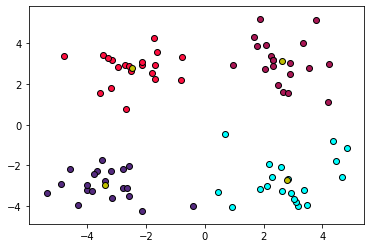

In [6]:
for x, y, lab in zip(X[:,0], X[:,1], labels):
    plt.scatter(x,y, color= (lab/3,1/(5*lab+1),1/(lab+1)), edgecolors="k")
plt.scatter(centroids[:,0],centroids[:,1],color="y", edgecolors="k");

In [7]:
filename = 'testSet2.txt'
colName, returnMatX, target = file2matrix(filename , header = False, delimeter="\t")
X = returnMatX

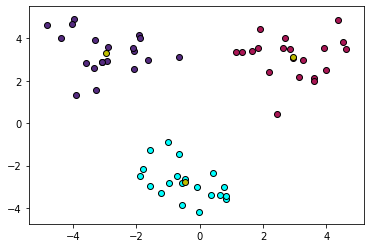

In [8]:
## bisecting kmeans clustering
model = BiKmeans(k=3, method="cosine", maxIter = 300, normalize = False)
model.fit(X)
centroids = model.centroids_
labels = model.labels_
for x, y, lab in zip(X[:,0], X[:,1], labels):
    plt.scatter(x,y, color= (lab/3,1/(5*lab+1),1/(lab+1)), edgecolors="k")
plt.scatter(centroids[:,0],centroids[:,1],color="y", edgecolors="k");